## Exploratory Data Analysis (EDA)

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
data = pd.read_csv('data/raw/Building_3.csv')
carbon_intensity = pd.read_csv('data/raw/carbon_intensity.csv')

data["Carbon Intensity (kg_CO2/kWh)"] = carbon_intensity["kg_CO2/kWh"].values

VARIABLES_TO_FORECAST = [
    "Equipment Electric Power (kWh)", # "non_shiftable_load",
    "DHW Heating (kWh)", # "dhw_demand",
    "Cooling Load (kWh)", # "cooling_demand",
    "Solar Generation (W/kW)", # "solar_generation",
    "Carbon Intensity (kg_CO2/kWh)" # "carbon_intensity",
]

data.head()

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature (C),Average Unmet Cooling Setpoint Difference (C),Indoor Relative Humidity (%),Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Heating Load (kWh),Solar Generation (W/kW),Occupant Count (people),Temperature Set Point (C),HVAC Mode (Off/Cooling/Heating),Carbon Intensity (kg_CO2/kWh)
0,6,1,2,0,24.140535,-0.303909,73.127610,0.423079,0.0,0.0,0.0,0.0,2.0,24.444444,1,0.470113
1,6,2,2,0,23.777792,-0.666652,74.936002,0.420027,0.0,0.0,0.0,0.0,2.0,24.444444,1,0.467053
2,6,3,2,0,23.487175,-0.957269,76.516999,0.417654,0.0,0.0,0.0,0.0,2.0,24.444444,1,0.457809
3,6,4,2,0,23.285878,-1.158567,77.700432,0.420590,0.0,0.0,0.0,0.0,2.0,24.444444,1,0.457264
4,6,5,2,0,22.968087,-1.476357,79.295046,0.439679,0.0,0.0,0.0,0.0,1.0,24.444444,1,0.461049


In [52]:
data.shape

(2208, 16)

In [53]:
data[VARIABLES_TO_FORECAST].describe() # a scaler is needed

,Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Solar Generation (W/kW),Carbon Intensity (kg_CO2/kWh)
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,0.873915,0.156886,1.785981,181.965621,0.438969
std,0.843278,0.413084,1.212467,228.982415,0.054517
min,0.396235,0.000000,0.000000,0.000000,0.270066
25%,0.499341,0.000000,0.780963,0.000000,0.397706
50%,0.774205,0.000000,1.597408,27.846772,0.451167
75%,1.002537,0.138549,2.605482,388.286173,0.479876
max,8.475027,5.684680,6.181074,712.919243,0.563472


In [54]:
# import scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
new_data = pd.DataFrame(scaler.fit_transform(data[VARIABLES_TO_FORECAST]), columns=VARIABLES_TO_FORECAST)
new_data.describe()

,Equipment Electric Power (kWh),DHW Heating (kWh),Cooling Load (kWh),Solar Generation (W/kW),Carbon Intensity (kg_CO2/kWh)
count,2.208000e+03,2.208000e+03,2.208000e+03,2.208000e+03,2.208000e+03
mean,6.757879e-17,3.539842e-17,-7.723291e-17,8.688702e-17,4.054728e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-5.665844e-01,-3.798780e-01,-1.473348e+00,-7.948507e-01,-3.098851e+00
25%,-4.442892e-01,-3.798780e-01,-8.290910e-01,-7.948507e-01,-7.570592e-01
50%,-1.182682e-01,-3.798780e-01,-1.555631e-01,-6.732122e-01,2.237958e-01
75%,1.525603e-01,-4.440049e-02,6.760485e-01,9.012364e-01,7.505142e-01
max,9.015807e+00,1.338481e+01,3.625739e+00,2.319278e+00,2.284244e+00


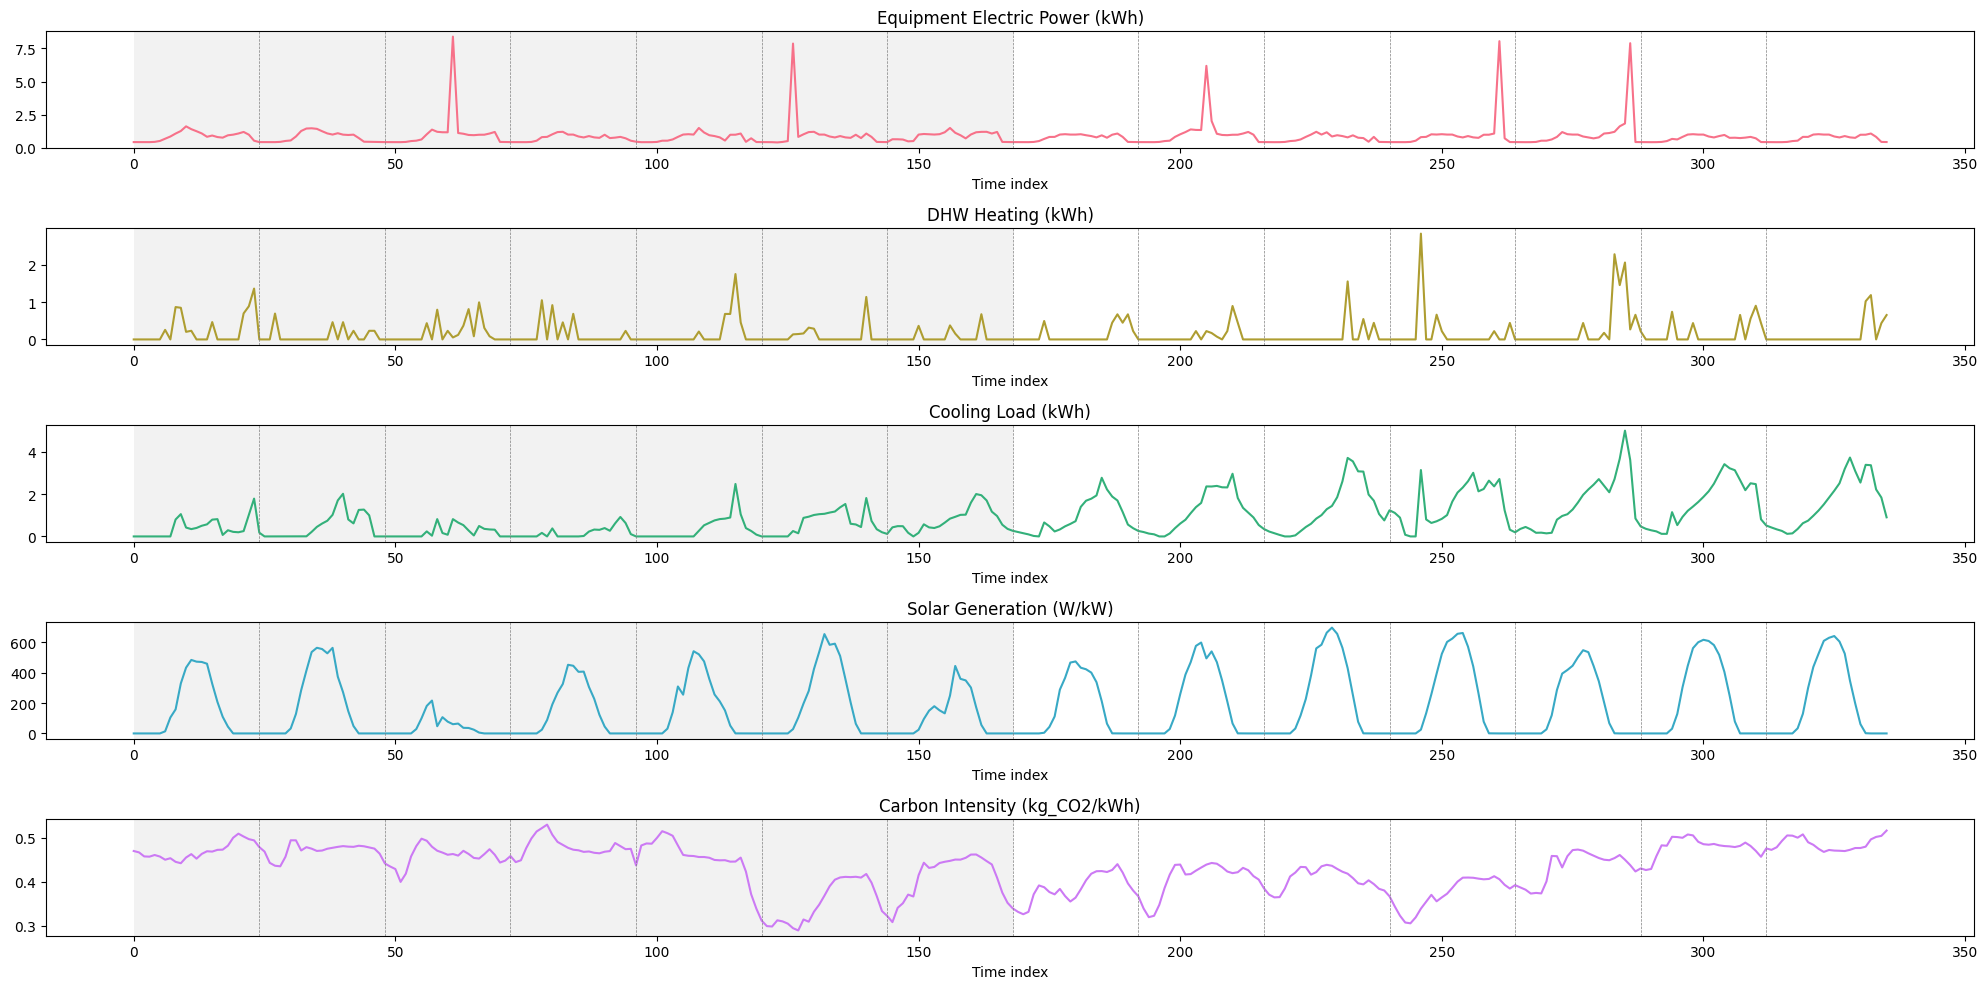

In [55]:
# plot the variables in function of time (index)

VARIABLES_TO_FORECAST2 = [
    "Equipment Electric Power (kWh)", # "non_shiftable_load",
    "DHW Heating (kWh)", # "dhw_demand",
    "Cooling Load (kWh)", # "cooling_demand",
    "Solar Generation (W/kW)", # "solar_generation",
    "Carbon Intensity (kg_CO2/kWh)" # "carbon_intensity",
]

fig, axes = plt.subplots(nrows=len(VARIABLES_TO_FORECAST2), ncols=1, figsize=(20, 10))
colors = sns.color_palette("husl", len(VARIABLES_TO_FORECAST2))

src_data = data.iloc[:24*7*2]

for i, var in enumerate(VARIABLES_TO_FORECAST2):
    sns.lineplot(x=src_data.index, y=src_data[var], ax=axes[i], color=colors[i])
    axes[i].set_title(var)
    axes[i].set_ylabel("")
    axes[i].set_xlabel("Time index")
    # plot vertical lines to separate the different days (each 24 time steps)
    for j in range(1, src_data.shape[0] // 24):
        axes[i].axvline(x=j*24, color='grey', linestyle='--', linewidth=0.5)

    # put a different light background for each week (each 24*7 time steps)
    axes[i].axvspan(0, 24*7, facecolor='grey', alpha=0.1)
    # axes[i].axvspan(24*14, 24*21, facecolor='grey', alpha=0.1)

    
plt.tight_layout()

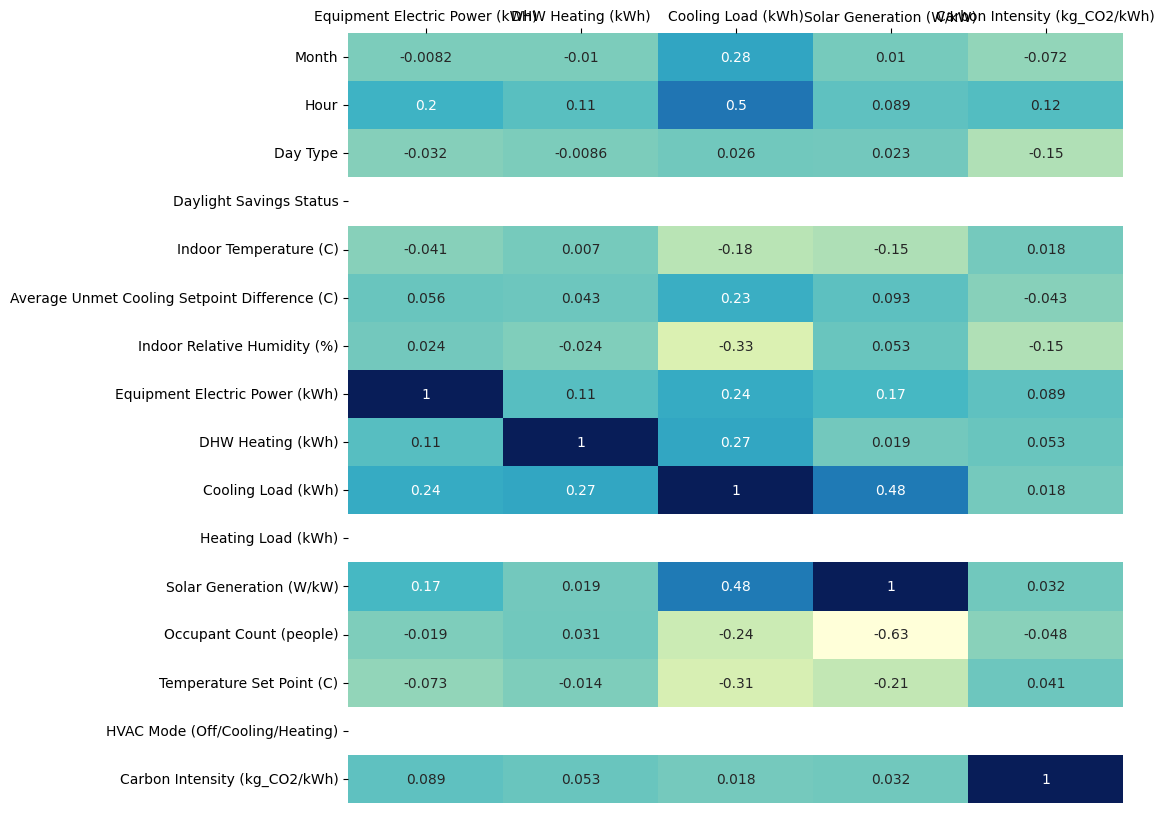

In [56]:
# plot the correlation matrix
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr()[VARIABLES_TO_FORECAST], annot=True, cmap="YlGnBu", cbar=False)
# put the xlabel on top
plt.gca().xaxis.tick_top()
plt.show()

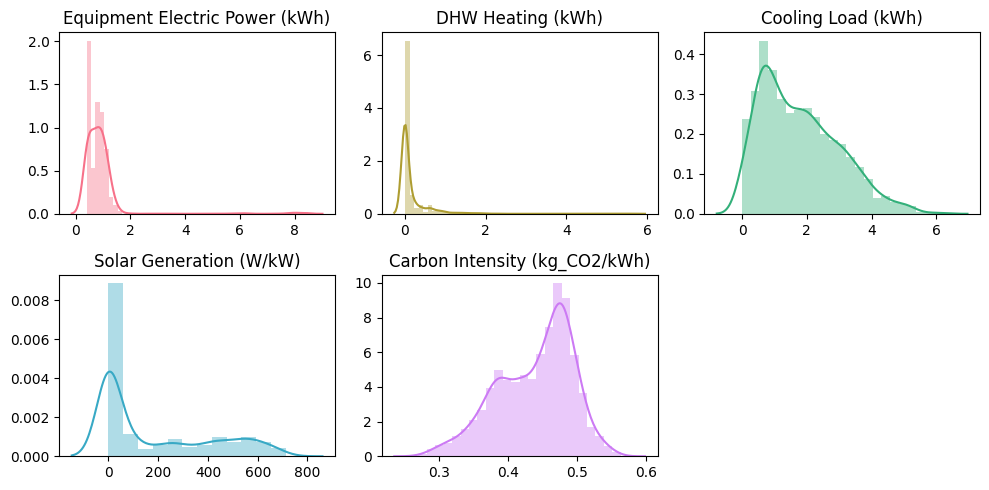

In [57]:
def plot_distribution():
    # plot distribution of the variables
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
    colors = sns.color_palette("husl", len(VARIABLES_TO_FORECAST))

    # ignore deprecation warning
    import warnings
    warnings.filterwarnings("ignore")

    for i, var in enumerate(VARIABLES_TO_FORECAST[:3]):
        sns.distplot(data[var], ax=axes[0, i], color=colors[i], kde=True)
        axes[0, i].set_title(var)
        axes[0, i].set_ylabel("")
        axes[0, i].set_xlabel("")

    for i, var in enumerate(VARIABLES_TO_FORECAST[3:]):
        sns.distplot(data[var], ax=axes[1, i], color=colors[i+3], kde=True)
        axes[1, i].set_title(var)
        axes[1, i].set_ylabel("")
        axes[1, i].set_xlabel("")

    # discard the last subplot
    axes[1, 2].set_visible(False)

    plt.tight_layout()

plot_distribution()

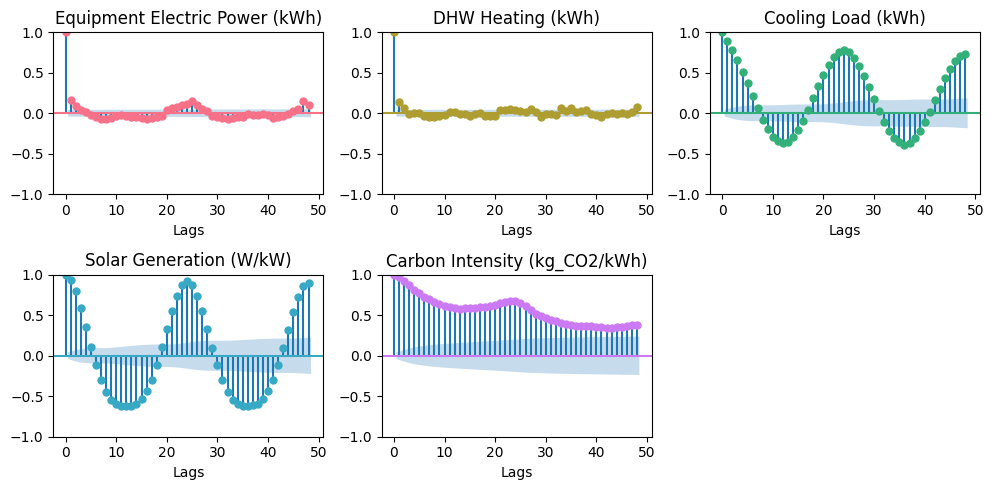

In [58]:
from statsmodels.graphics.tsaplots import plot_acf

# plot autocorrelation of the variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
colors = sns.color_palette("husl", len(VARIABLES_TO_FORECAST))

for i, var in enumerate(VARIABLES_TO_FORECAST[:3]):
    plot_acf(data[var], ax=axes[0, i], color=colors[i], lags=48)
    axes[0, i].set_title(var)
    axes[0, i].set_ylabel("")
    axes[0, i].set_xlabel("Lags")

for i, var in enumerate(VARIABLES_TO_FORECAST[3:]):
    plot_acf(data[var], ax=axes[1, i], color=colors[i+3], lags=48)
    axes[1, i].set_title(var)
    axes[1, i].set_ylabel("")
    axes[1, i].set_xlabel("Lags")

# discard the last subplot
axes[1, 2].set_visible(False)

plt.tight_layout()
